# Mass spring system



<img width="300px" src="media/maxresdefault.jpg"/>

**Equation of motion **

$m\ddot{x} + kx = mg $

let $Y = (x, \dot{x})$, then the equation of motion are rewritten as:
$$
\dot{Y} = \left(\begin{array}{cc} 
    y[1] \\
    -\frac{k}{m}y[0]  + g
\end{array}\right)
$$


In [2]:
from utils import *

y0 = [0.,0.]
t0 = 0
t1 = 10
dt = 0.001

g = 9.81
k = 100.0
m = 1.0


The following functions define the equations of motion.

In [3]:
def f(t,Y):
    return [Y[1], (-k/m)*Y[0] + g]

w = (k/m)**0.5
c1 = y0[0] - (m*g)/k
c2 = y0[1]/w

def f_derived(ti):
    x = c1*cos(w*ti) + c2*w*sin(w*ti) + (m*g)/k;
    xdot = -c1*w*sin(w*ti) + c2*w*cos(w*ti);
    return [x ,  xdot]

### Simulating using ODE45

ode45 is a helper function in utils.py 

The following code simply runs the integrator and derived analytical equations with the specified initial conditions.

Then the matplotlib library is used to plot both the integrated and analytical results.


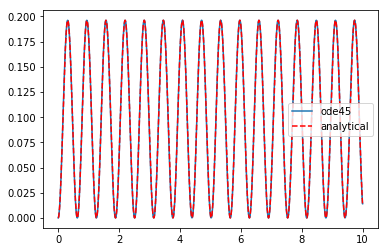

In [4]:
X,Yo = ode45(f, y0, (t0, t1,dt))
plt.plot(X,Yo[:,0], label='ode45')

Ya = np.array([f_derived(t) for t in X])
plt.plot(X,Ya[:,0], 'r--', label='analytical');


plt.legend()
plt.show()